In [17]:
%pip install pandas numpy matplotlib scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, math, random, time

Note: you may need to restart the kernel to use updated packages.


### Provide sensor data recording to run the processing/analysis on

In [18]:
SENSOR_DATA = 'recordings/walking2.csv'
ALGORITHM_DATA = SENSOR_DATA.replace('recordings/', 'analysis/').replace('.csv', '_algo.csv')
ANGLES_DATA = SENSOR_DATA.replace('recordings/', 'analysis/').replace('.csv', '_angles.csv')

### Cut off debug data from flashing if there's any left

In [19]:
HEADERS = "time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z"
lines = []
cutting = False
with open(SENSOR_DATA, 'r') as file:
    found_start = False
    for (i, line) in enumerate(file.readlines()):
        if not found_start and HEADERS in line:
            if i == 0:
                break
            found_start = True
            cutting = True
        if found_start:
            lines.append(line)
if cutting:
    with open(SENSOR_DATA, 'w') as file:
        file.writelines(lines[:-1])

### Run the sensor processing code

In [20]:
result = os.system(f'cargo run --release -- {SENSOR_DATA}')
if result != 0:
    raise Exception('Failed to compile sensor data')

    Finished `release` profile [optimized] target(s) in 0.01s
     Running `target/release/test-processing recordings/walking2.csv`


### Load sensor data

In [21]:
sensors = pd.read_csv(SENSOR_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
now = time.time()
sensors['t'] = pd.to_datetime((sensors['time'] / 1_000_000_000.0) + now, unit='s')
sensors.set_index(sensors['t'], inplace=True)
sensors.drop(columns=['t'], inplace=True)
sensors

,time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z
t,,,,,,,
2024-11-17 23:10:45.082017422,1686201977000,-0.043034,0.014256,0.018519,-1.541866,-9.453506,0.999579
2024-11-17 23:10:45.088392496,1686208352000,-0.080605,0.026380,0.034773,-1.549049,-9.447520,0.995988
2024-11-17 23:10:45.096738338,1686216698000,-0.042900,0.013989,0.018119,-1.562217,-9.449914,0.987608
2024-11-17 23:10:45.105098486,1686225058000,-0.042767,0.013723,0.018119,-1.565808,-9.453506,0.986411
2024-11-17 23:10:45.113481522,1686233441000,-0.042634,0.014256,0.018253,-1.549049,-9.459491,0.976834
...,...,...,...,...,...,...,...
2024-11-17 23:11:03.476275444,1704596235000,-0.040236,0.018119,0.018652,-1.588553,-9.440337,0.790087
2024-11-17 23:11:03.484481335,1704604441000,-0.041302,0.015588,0.018519,-1.604115,-9.436746,0.784101
2024-11-17 23:11:03.493032455,1704612992000,-0.043300,0.010792,0.018253,-1.589750,-9.447520,0.764947


### Load algorithm debug data

In [22]:
algo = pd.read_csv(ALGORITHM_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
algo['t'] = pd.to_datetime((algo['time'] / 1_000_000_000.0) + now, unit='s')
algo.set_index(algo['t'], inplace=True)
algo.drop(columns=['t'], inplace=True)
algo.head()

,time,orientation.w,orientation.x,orientation.y,orientation.z,velocity.x,velocity.y,velocity.z,position.x,position.y,...,world_acc.y,world_acc.z,gyro_orientation.w,gyro_orientation.x,gyro_orientation.y,gyro_orientation.z,accel_orientation.w,accel_orientation.x,accel_orientation.y,accel_orientation.z
t,,,,,,,,,,,,,,,,,,,,,
2024-11-17 23:10:45.081998825,1686201958400,0.707107,-0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-11-17 23:10:45.088421345,1686208380928,0.710611,-0.703538,0.006128,0.005420,-0.008950,0.005798,-0.002091,-0.000057,0.000037,...,0.902787,-0.325603,0.706924,-0.707290,0.000139,0.000019,0.740824,-0.666830,0.060003,0.054010
2024-11-17 23:10:45.096678972,1686216638464,0.713729,-0.700249,0.011649,0.010342,-0.018506,0.011903,-0.004323,-0.000210,0.000136,...,0.809464,-0.295623,0.710485,-0.703663,0.006221,0.005434,0.740483,-0.667128,0.060469,0.054479
2024-11-17 23:10:45.105067492,1686225027072,0.716482,-0.697250,0.016630,0.014785,-0.026232,0.016849,-0.006153,-0.000430,0.000277,...,0.731607,-0.269611,0.713602,-0.700377,0.011742,0.010358,0.740419,-0.667181,0.060579,0.054587
2024-11-17 23:10:45.113456011,1686233415680,0.718888,-0.694554,0.021044,0.018727,-0.032091,0.020647,-0.007610,-0.000700,0.000450,...,0.653598,-0.247049,0.716355,-0.697378,0.016724,0.014801,0.740117,-0.667625,0.059884,0.054019


### Preview raw sensor data

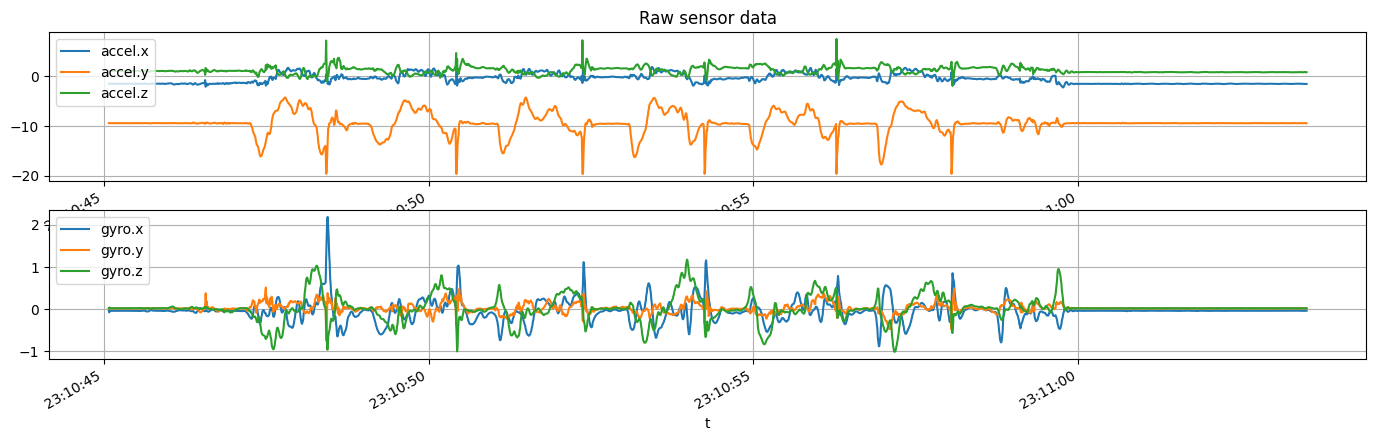

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1)

sensors['accel.x'].plot(ax=ax1)
sensors['accel.y'].plot(ax=ax1)
sensors['accel.z'].plot(ax=ax1)
ax1.legend(loc='upper left')
ax1.grid()

sensors['gyro.x'].plot(ax=ax2)
sensors['gyro.y'].plot(ax=ax2)
sensors['gyro.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()

ax1.set_title('Raw sensor data')
fig.set_figwidth(17)

### Preview computed position, velocity, acceleration

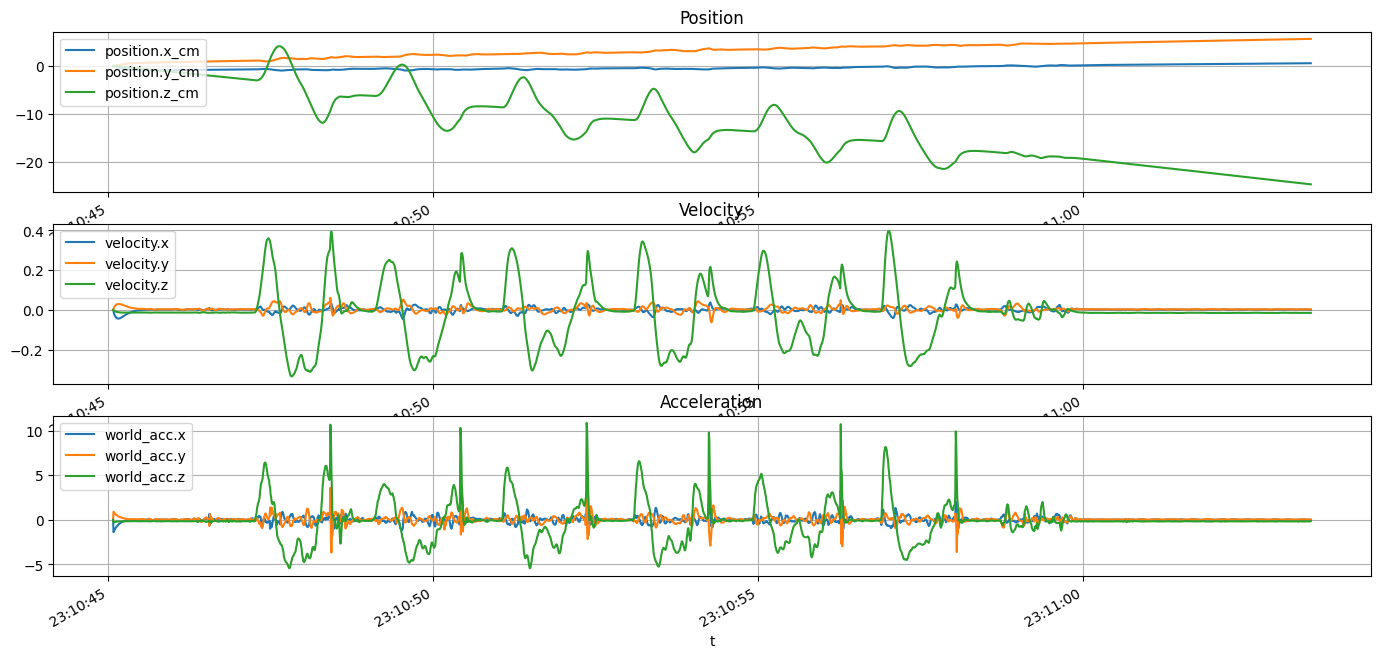

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

algo['position.x_cm'] = algo['position.x'] * 100
algo['position.y_cm'] = algo['position.y'] * 100
algo['position.z_cm'] = algo['position.z'] * 100

algo['position.x_cm'].plot(ax=ax1)
algo['position.y_cm'].plot(ax=ax1)
algo['position.z_cm'].plot(ax=ax1)
ax1.legend(loc='upper left')
ax1.grid()
ax1.set_title('Position')

algo['velocity.x'].plot(ax=ax2)
algo['velocity.y'].plot(ax=ax2)
algo['velocity.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()
ax2.set_title('Velocity')

algo['world_acc.x'].plot(ax=ax3)
algo['world_acc.y'].plot(ax=ax3)
algo['world_acc.z'].plot(ax=ax3)
ax3.legend(loc='upper left')
ax3.grid()
ax3.set_title('Acceleration')

fig.set_figwidth(17)
fig.set_figheight(8)

### Load Euler angles

In [25]:
angles = pd.read_csv(ANGLES_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
angles['t'] = pd.to_datetime((angles['time'] / 1_000_000_000.0) + now, unit='s')
angles.set_index(angles['t'], inplace=True)
angles.drop(columns=['t'], inplace=True)
angles.head()

,time,fusion.yaw,fusion.pitch,fusion.roll,gyro.yaw,gyro.pitch,gyro.roll,accel.yaw,accel.pitch,accel.roll
t,,,,,,,,,,
2024-11-17 23:10:45.081998825,1686201958400,0.000000,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2024-11-17 23:10:45.088421345,1686208380928,-0.052647,0.936023,-89.427290,-0.009711,0.012794,-90.029660,4.325248e-07,9.261135,-83.981920
2024-11-17 23:10:45.096678972,1686216638464,-0.088974,1.782933,-88.908990,-0.059182,0.944661,-89.447710,-4.326185e-07,9.337029,-84.033700
2024-11-17 23:10:45.105067492,1686225027072,-0.114954,2.547539,-88.443820,-0.095407,1.791764,-88.929750,4.326406e-07,9.354779,-84.043110
2024-11-17 23:10:45.113456011,1686233415680,-0.132430,3.225799,-88.031105,-0.121574,2.556494,-88.464615,0.000000e+00,9.251646,-84.104256


### Compare orientations

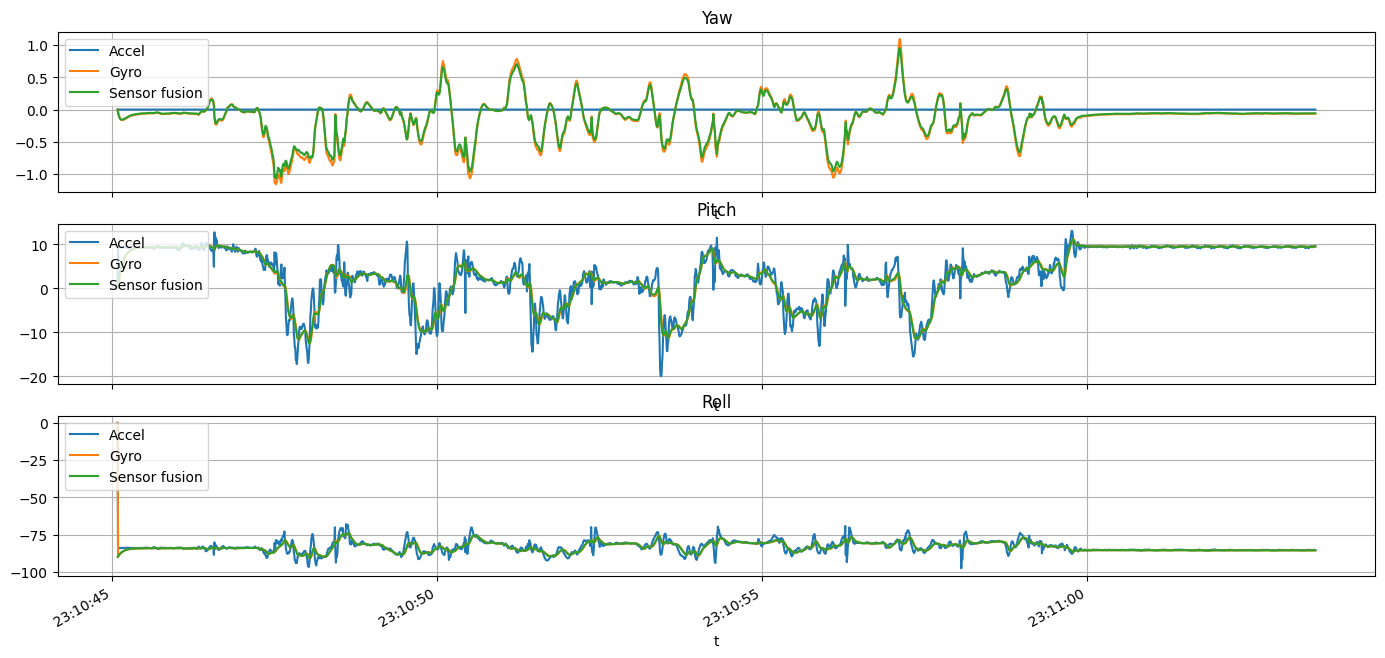

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

angles['accel.yaw'].plot(ax=ax1, label='Accel')
angles['gyro.yaw'].plot(ax=ax1, label='Gyro')
angles['fusion.yaw'].plot(ax=ax1, label='Sensor fusion')
ax1.legend(loc='upper left')
ax1.grid()
ax1.set_title('Yaw')
ax1.xaxis.set_ticklabels([])

angles['accel.pitch'].plot(ax=ax2, label='Accel')
angles['gyro.pitch'].plot(ax=ax2, label='Gyro')
angles['fusion.pitch'].plot(ax=ax2, label='Sensor fusion')
ax2.legend(loc='upper left')
ax2.grid()
ax2.set_title('Pitch')
ax2.xaxis.set_ticklabels([])

angles['accel.roll'].plot(ax=ax3, label='Accel')
angles['gyro.roll'].plot(ax=ax3, label='Gyro')
angles['fusion.roll'].plot(ax=ax3, label='Sensor fusion')
ax3.legend(loc='upper left')
ax3.grid()
ax3.set_title('Roll')

fig.set_figwidth(17)
fig.set_figheight(8)

### Packets per second

<Axes: xlabel='t'>

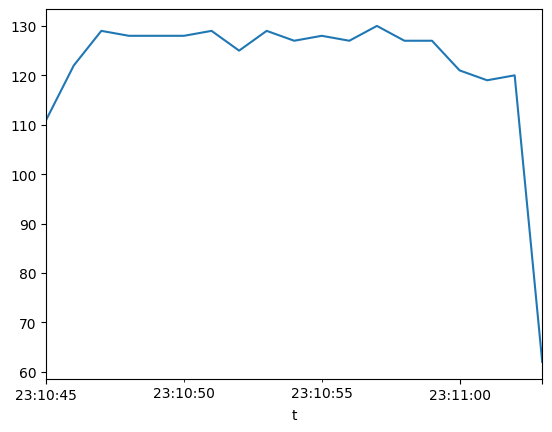

In [31]:
packets = sensors.resample('1s').count()
packets.drop(columns=['gyro.x','gyro.y'], inplace=True)
packets.rename(columns={'time': 'packets/s'}, inplace=True)
packets['packets/s'].plot()